Gender Gap Anaysis: create a model to explain the gender gap? Use only netincome (netto), female (frau), age (alter), hours worked (arbeitsstd). Interpret the results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/alrebd01/Downloads/umfragedaten.csv')

In [3]:
print(data.head())

     id  gebjahr          berufstaetig  arbeitsstd  arztbes rauch    gro  \
0  1359   1967.0   NICHT ERWERBSTAETIG         NaN      1.0    ja  162.0   
1  2455   1964.0  HAUPTBERUFL.HALBTAGS        30.0      1.0  nein  165.0   
2   200   1980.0   NICHT ERWERBSTAETIG         NaN      3.0  nein  166.0   
3  1280   1968.0  HAUPTBERUFL.GANZTAGS        50.0      0.0  nein  180.0   
4  2384   1995.0   NICHT ERWERBSTAETIG         NaN      1.0  nein  161.0   

    gew      schulabschluss    schulabschluss_v    schulabschluss_m  \
0  79.0      MITTLERE REIFE      MITTLERE REIFE      HOCHSCHULREIFE   
1  59.0      MITTLERE REIFE  VOLKS-,HAUPTSCHULE  VOLKS-,HAUPTSCHULE   
2  86.0      HOCHSCHULREIFE      HOCHSCHULREIFE      HOCHSCHULREIFE   
3  95.0  FACHHOCHSCHULREIFE      MITTLERE REIFE      MITTLERE REIFE   
4  46.0       NOCH SCHUELER      MITTLERE REIFE  VOLKS-,HAUPTSCHULE   

          hoe_abschluss       hoe_abschluss_v       hoe_abschluss_m  netto  \
0                 LEHRE  GEWERBL.,LAND

In [4]:
#Q2
# Calculate the average net income
average_net_income = data["netto"].mean()

print("Average Net Income:", average_net_income)

Average Net Income: 1569.513065881487


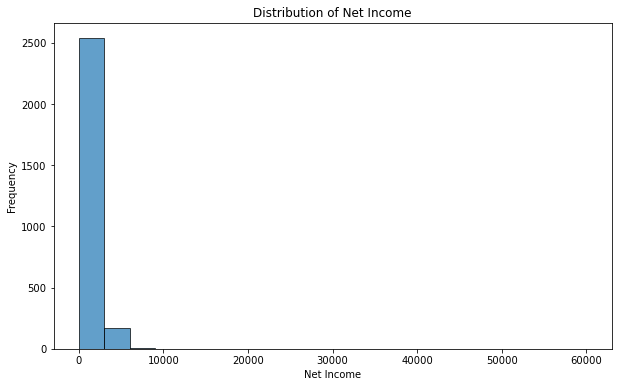

In [5]:
#Q3
plt.figure(figsize=(10, 6))
plt.hist(data['netto'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Net Income')
plt.xlabel('Net Income')
plt.ylabel('Frequency')
plt.show()

In [6]:
#Q4

# Filter data for men and women and here the gender column named frau:
men_data = data[data['frau'] == 'männlich']
women_data = data[data['frau'] == 'weiblich']

# Calculate mean and standard deviation for net income for men and women
mean_net_income_men = men_data['netto'].mean()
std_dev_men = men_data['netto'].std()

mean_net_income_women = women_data['netto'].mean()
std_dev_women = women_data['netto'].std()

print(f"Mean Net Income for Men: {mean_net_income_men:.2f}, Standard Deviation: {std_dev_men:.2f}")
print(f"Mean Net Income for Women: {mean_net_income_women:.2f}, Standard Deviation: {std_dev_women:.2f}")




Mean Net Income for Men: 1908.21, Standard Deviation: 2495.16
Mean Net Income for Women: 1195.95, Standard Deviation: 793.59


Men earn more compared to women, as the mean net income for Men (1908.21) is higher than the mean net income for Women (1195.95) 

Q5. To determine if there is a connection between age and net income, we can perform a correlation analysis between these two variables:

In [7]:
correlation = data['alter'].corr(data['netto'])

print(f"Correlation between Age and Net Income: {correlation:.2f}")

Correlation between Age and Net Income: -0.02


The correlation between age and Net Income is weak negative correlation and this means that the change in age does not predict a significant change in net income.

In [8]:
pip install statsmodels


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
print(data.columns)

Index(['id', 'gebjahr', 'berufstaetig', 'arbeitsstd', 'arztbes', 'rauch',
       'gro', 'gew', 'schulabschluss', 'schulabschluss_v', 'schulabschluss_m',
       'hoe_abschluss', 'hoe_abschluss_v', 'hoe_abschluss_m', 'netto', 'zufr',
       'alter', 'frau'],
      dtype='object')


In [10]:
# Display data types of all columns
print(data.dtypes)

id                    int64
gebjahr             float64
berufstaetig         object
arbeitsstd          float64
arztbes             float64
rauch                object
gro                 float64
gew                 float64
schulabschluss       object
schulabschluss_v     object
schulabschluss_m     object
hoe_abschluss        object
hoe_abschluss_v      object
hoe_abschluss_m      object
netto               float64
zufr                float64
alter               float64
frau                 object
dtype: object


In [27]:
print(data.columns)


Index(['id', 'gebjahr', 'berufstaetig', 'arbeitsstd', 'arztbes', 'rauch',
       'gro', 'gew', 'schulabschluss_v', 'schulabschluss_m', 'hoe_abschluss',
       'hoe_abschluss_v', 'hoe_abschluss_m', 'netto', 'zufr', 'alter',
       'schulabschluss_FACHHOCHSCHULREIFE', 'schulabschluss_HOCHSCHULREIFE',
       'schulabschluss_MITTLERE REIFE', 'schulabschluss_NOCH SCHUELER',
       'schulabschluss_OHNE ABSCHLUSS', 'schulabschluss_VOLKS-,HAUPTSCHULE',
       'frau_weiblich'],
      dtype='object')


In [29]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load the data
data = pd.read_csv('/Users/alrebd01/Downloads/umfragedaten.csv')

# Convert categorical features to one-hot encoding if needed
data = pd.get_dummies(data, columns=['schulabschluss', 'frau'], drop_first=True)

# Define the features and target variable
X = data[['netto', 'alter', 'arbeitsstd']]
y = data['frau_weiblich']

# Convert X to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Convert y to numeric (assuming frau_weiblich is binary)
y = pd.to_numeric(y, errors='coerce')

# Drop rows with missing values in X or y
missing_index = X[X.isnull().any(axis=1) | y.isnull()].index
X = X.drop(index=missing_index)
y = y.drop(index=missing_index)

# Check the number of rows after dropping missing values
print("Number of rows after dropping missing values:", len(X))

# Add a constant to the features
X = sm.add_constant(X)

# Create and fit the logistic regression model
try:
    model = sm.Logit(y, X).fit()
    print(model.summary())
except Exception as e:
    print("Error:", e)


Number of rows after dropping missing values: 1557
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          frau_weiblich   No. Observations:                 1557
Model:                          Logit   Df Residuals:                     1553
Method:                           MLE   Df Model:                            3
Date:                Wed, 19 Jun 2024   Pseudo R-squ.:                     inf
Time:                        19:09:39   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6792      0.344     10.687      0.000       3

/Users/alrebd01/miniforge3/envs/ml1/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/alrebd01/miniforge3/envs/ml1/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/Users/alrebd01/miniforge3/envs/ml1/lib/python3.8/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/alrebd01/miniforge3/envs/ml1/lib/python3.8/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


- Logit was chosen for your analysis because it is specifically designed for binary logistic regression tasks, offering interpretability, robust statistical inference, and tools for model evaluation—all essential for understanding the relationships between predictors (net income, age, hours worked, etc.) and the likelihood of being female in your dataset.

- Net Income (netto): Higher net income is associated with a slight decrease in the likelihood of being female (frau_weiblich).

- Age (alter): Age does not have a significant effect on the likelihood of being female (frau_weiblich).

- Hours Worked (arbeitsstd): More hours worked is linked to a lower likelihood of being female (frau_weiblich).

- Model Fit: The model has successfully converged (converged: True), indicating a good fit to the data.